# UNA SERIE DE NOTAS

## IMPORTACIONES

Para la realización del ejercicio hemos importado las siguientes librerias.

- Numpy: Libreria dedicada a las operaciones matemáticas
- Pandas: Libreria dedicada al análisis de datos
- Matplotlib: Libreria dedicada a la visualización de datos mediante gráficas.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter #MÁXIMO
from math import *
print('Setup complete')

Setup complete


## CREACIÓN DEL DATASET

Con las notas proporcionadas, se crea un dataframe con todas ellas. También mediante info() comprobamos que se hayan tomado esos valores tipo int64.

In [2]:
df_notas = pd.DataFrame({'NOTAS':np.array([3,19,10,15,14,12,9,8,11,12,11,12,13,11,14,16])})

In [3]:
df_notas.head()

,NOTAS
0,3
1,19
2,10
3,15
4,14


In [4]:
round(df_notas.describe(), 2)

,NOTAS
count,16.00
mean,11.88
std,3.61
min,3.00
25%,10.75
50%,12.00
75%,14.00
max,19.00


In [5]:
df_notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   NOTAS   16 non-null     int64
dtypes: int64(1)
memory usage: 256.0 bytes


## ANÁLISIS DE NOTAS

El primer paso para realizar un buen análisis de datos es saber cuántos datos tenemos. De esta manera detectamos si faltan características y si se dispone de bastantes datos para realizar Maching Learning.



In [6]:
numero_datos = df_notas.count()[0]
if numero_datos > 10: #Se considera 10 datos son suficientes para realizar un buen análisis
  print(f'Cantidad de datos: {numero_datos}')
else:
  print('No se tiene la cantidad necesaria de datos para realizar un buen aprendizaje')

Cantidad de datos: 16


### **Medidas centralizadas**



#### Máximos y mínimos

Con el objetivo de conocer los rangos, es conveniente saber su mín y máx.

In [7]:
min = df_notas['NOTAS'].min()
max = df_notas['NOTAS'].max()
print('Mínimo de nota: ', min, '\nMáximo de nota: ', max)

Mínimo de nota:  3 
Máximo de nota:  19


Para corroborar eso ordenamos el dataframe de menor a mayor y obtenemos el primer y último elemento

In [8]:
notas_ordenadas = df_notas.sort_values(by = 'NOTAS')
notas_ordenadas = notas_ordenadas.reset_index(drop=True) #Resetear el index ya que sino sale desordenado
notas_ordenadas.head(2) #Inicio de la lista


,NOTAS
0,3
1,8


In [9]:
notas_ordenadas.tail(2) #Final de la lista

,NOTAS
14,16
15,19


A simple vista se ve cuáles son los valores mínimos y máximos. Sin embargo, lo corrobaremos mediante un condicional.

In [10]:
if notas_ordenadas['NOTAS'][0] == min and notas_ordenadas['NOTAS'][len(notas_ordenadas)-1] == max:
  print('------------------ VALORES MÁXIMOS Y MÍNIMOS------------------')
  print('Valor mínimo:', min)
  print('Valor máximo:', max)
else:
  print('Error')

------------------ VALORES MÁXIMOS Y MÍNIMOS------------------
Valor mínimo: 3
Valor máximo: 19


#### Media aritmética

Promedio de todos los datos de la muestra. 

In [11]:
media = df_notas.mean() #Función para obtener la media
print('Media: ', media[0])

Media:  11.875


Se puede realizar esto mismo sin aplicar esta función. La fórmula para el cálculo de la media es la siguiente:
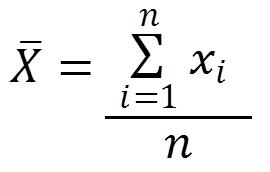

In [12]:
#Cálculo de la media sin función mean()
media = 0
xi = 0
if numero_datos > 0:
  for i in df_notas['NOTAS']:
    xi = xi + i
  media = xi/numero_datos
print('Media: ', media)

Media:  11.875


Interpretación del resultado: Si las notas fuese repartidas de manera equitativa, es decir, si hubiesemos empleado en todos los examenes los mismos esfuerzos, la nota habria sido de 11.875 de 20.

#### Mediana

Valor que ordenados los datos de una muestra de menor a mayor, desde el 50% de ellos a la izquierda y 50% derecha. Fórmula (varía dependiendo de si el total de datos es par o impar):

**IMPAR:**

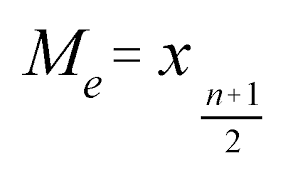

**PAR:**

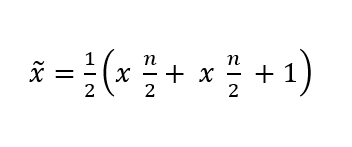

*1ª OPCIÓN*

In [13]:
mediana = np.median(df_notas)
print('Mediana: ', mediana)

Mediana:  12.0


*2ª OPCIÓN*

In [14]:
def calcularMediana():  
  mediana = 0 
  if numero_datos%2 == 0: #RESTO = 0; PAR
    indice = numero_datos/2
    rangoPython = indice -1 
    mediana = (notas_ordenadas['NOTAS'][rangoPython] + notas_ordenadas['NOTAS'][rangoPython +1 ])/2
    print('Mediana: ', mediana)
    
  else:
      indice = (numero_datos +1)/2
      mediana = (notas_ordenadas['NOTAS'][indice])/2
      print('Mediana: ', mediana)

  return (mediana, indice)


calcularMediana()[1]


Mediana:  12.0


8.0

Se establece el rango de Python ya que el índice en la lista de Python es diferente al natural, en el caso de Python empieza en 0. Para ello lo corregimos restando 1 al índice que se ha dado.



#### Moda

Valor que contiene más frecuencia absoluta.

In [15]:
contar = Counter(df_notas['NOTAS'])
print(contar)
moda = contar.most_common(1)[0][0]
print("Moda:", moda)


Counter({12: 3, 11: 3, 14: 2, 3: 1, 19: 1, 10: 1, 15: 1, 9: 1, 8: 1, 13: 1, 16: 1})
Moda: 12


### **Medida de dispersión**

In [16]:
def calculoVarianzaDesviacionTipica():
        n = numero_datos
        mediaAritmetica = notas_ordenadas.mean()
        varianza = 0
        c3 = 0
        for valorObservacion in notas_ordenadas['NOTAS']:
            x = valorObservacion
            moy = mediaAritmetica
            c1 = valorObservacion - mediaAritmetica
            c2 = c1 * c1
            c3 = c3 + c2

        varianza = c3 / (n - 1)

        desviacionTipica = np.sqrt(varianza)

        return ([varianza, desviacionTipica])

In [17]:
print("Rango de la serie = "+str(notas_ordenadas['NOTAS'][len(notas_ordenadas)-1]-notas_ordenadas['NOTAS'][0]))
varianzaDesviacionTipica = calculoVarianzaDesviacionTipica()

Rango de la serie = 16


In [18]:
print("\n-- VARIANZA --")
print("Varianza calculada = " + str(varianzaDesviacionTipica[0]))


-- VARIANZA --
Varianza calculada = NOTAS    13.05
dtype: float64


In [19]:
print("\n-- DESVIACION TIPICA --")
print("Desviación típica calculada = " + str(varianzaDesviacionTipica[1]))
desviacionTipica = varianzaDesviacionTipica[1]
print("68 % de los valores de las observaciones se sitúan entre " + str(media - desviacionTipica) + " y " + str(media + desviacionTipica))
print("95 % de los valores de las observaciones se sitúan entre " + str(media - (desviacionTipica * 2)) + " y " + str(media + (desviacionTipica * 2)))
print("99 % de los valores de las observaciones se sitúan entre " + str(media - (desviacionTipica * 3)) + " y " + str(media + (desviacionTipica * 3)))


-- DESVIACION TIPICA --
Desviación típica calculada = NOTAS    3.612478
dtype: float64
68 % de los valores de las observaciones se sitúan entre NOTAS    8.262522
dtype: float64 y NOTAS    15.487478
dtype: float64
95 % de los valores de las observaciones se sitúan entre NOTAS    4.650043
dtype: float64 y NOTAS    19.099957
dtype: float64
99 % de los valores de las observaciones se sitúan entre NOTAS    1.037565
dtype: float64 y NOTAS    22.712435
dtype: float64


### **Cuartiles**

In [20]:
def calculoDelosCuartiles(mediana,rangoMediana):
        n = numero_datos
        sort_caracteristica = notas_ordenadas['NOTAS']
        q1 = 0
        q2 = mediana
        q3 = 0

        #Cálculo Q1
        restoDivision = rangoMediana%2
        if (restoDivision != 0):
            q1 = sort_caracteristica[((rangoMediana/2)+1)-1]
        else:
            valorMin = sort_caracteristica[((rangoMediana/2)-1)]
            valorMax = sort_caracteristica[(rangoMediana/2)]
            q1 = (valorMin + ((valorMax - valorMin) / 2) + valorMax) / 2

        # Cálculo Q3
        nbdatos = len(sort_caracteristica)+1
        nbDatosDesdeMediana = nbdatos - rangoMediana
        restoDivision = nbDatosDesdeMediana % 2
        if (restoDivision != 0):
            q3 = sort_caracteristica[(rangoMediana+ceil(nbDatosDesdeMediana/2))-1]
        else:
            valorMinQ3 = sort_caracteristica[(rangoMediana+(nbDatosDesdeMediana/2))-1]
            valorMaxQ3 = sort_caracteristica[(rangoMediana+(nbDatosDesdeMediana/2))]
            q3 = (valorMin + ((valorMax - valorMin) / 2) + valorMax) / 2


        return ([q1, q2, q3])

In [21]:
print("      CUARTILES        ")
print("-----------------------------------------\n")
cuartiles = calculoDelosCuartiles(calcularMediana()[0], calcularMediana()[1])
print("25 % de las observaciones tienen un valor inferior a " + str(cuartiles[0]))
print("50 % de las observaciones tienen un valor inferior a " + str(cuartiles[1]))
print("75 % de las observaciones tienen un valor inferior a " + str(cuartiles[2]))

      CUARTILES        
-----------------------------------------

Mediana:  12.0
Mediana:  12.0
25 % de las observaciones tienen un valor inferior a 10.75
50 % de las observaciones tienen un valor inferior a 12.0
75 % de las observaciones tienen un valor inferior a 14


### **Detección de valores aberrantes**

In [22]:
def criterioDeTukey(primerCuartil, tercerCuartil):

        valoresAberrantesInferiores = []
        valoresAberrantesSuperiores = []
        caracteristica = notas_ordenadas['NOTAS']
        intercuartil = tercerCuartil - primerCuartil
        print("Inter-cuartil = "+str(intercuartil))
        limiteInferior = primerCuartil - (1.5 * intercuartil)
        limiteSuperior = tercerCuartil + (1.5 * intercuartil)

        for valorObservacion in caracteristica:
            if valorObservacion < limiteInferior:
                valoresAberrantesInferiores.append(valorObservacion)

            if valorObservacion > limiteSuperior:
                valoresAberrantesSuperiores.append(valorObservacion)

        valoresAberrantes = valoresAberrantesInferiores + valoresAberrantesSuperiores

        return valoresAberrantes

In [23]:
print("\n\n-----------------------------------------")
print("      DETECCION VALORES ABERRANTES        ")
print("-----------------------------------------\n")
print("> Criterios de Tukey")
valoresAberrantes = criterioDeTukey(cuartiles[0], cuartiles[2])
print("Cantidad de valores aberrantes: " + str(len(valoresAberrantes)))
print("Valores:" + str(valoresAberrantes))



-----------------------------------------
      DETECCION VALORES ABERRANTES        
-----------------------------------------

> Criterios de Tukey
Inter-cuartil = 3.25
Cantidad de valores aberrantes: 2
Valores:[3, 19]


## GRÁFICAS

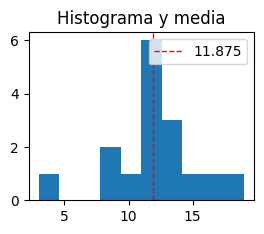

In [24]:
plt.subplot(2, 2, 1)
plt.hist(df_notas['NOTAS'])
plt.title("Histograma y media")
plt.axvline(media, color='red', linestyle='dashed', linewidth=1,label = str(media))
plt.legend(loc='upper right')

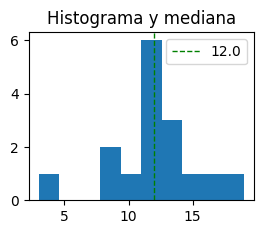

In [25]:
plt.subplot(2, 2, 2)
plt.hist(df_notas['NOTAS'])
plt.title("Histograma y mediana")
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=1,label = str(mediana))
plt.legend(loc='upper right')

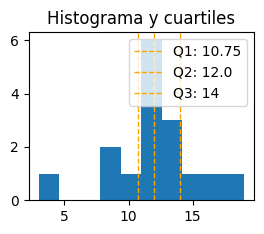

In [26]:
plt.subplot(2, 2, 3)
plt.hist(df_notas['NOTAS'])
plt.title("Histograma y cuartiles")
plt.axvline(cuartiles[0], color='orange', linestyle='dashed', linewidth=1,label = "Q1: "+str(cuartiles[0]))
plt.axvline(cuartiles[1], color='orange', linestyle='dashed', linewidth=1,label = "Q2: "+str(cuartiles[1]))
plt.axvline(cuartiles[2], color='orange', linestyle='dashed', linewidth=1,label = "Q3: "+str(cuartiles[2]))
plt.legend(loc='upper right')

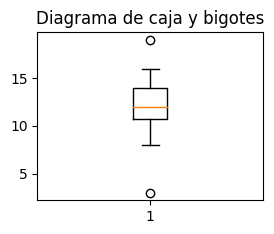

In [27]:
plt.subplot(2, 2, 4)
plt.boxplot(df_notas['NOTAS'])
plt.title("Diagrama de caja y bigotes")
plt.show()